# Método de Shooting - equação de Blasius

# Equação de Blasius:

$$2\frac{d^3f}{d\eta^3} + f\frac{d^2f}{d\eta^2}=0, 0 < \eta < \infty$$

Com as condições iniciais:

$$f(0) = 0, \frac{df}{d\eta}(0)=0, \frac{df}{d\eta}(\infty) = 1$$

Podemos formular tal problema como um sistema de EDOs:

- $\frac{du_1}{d\eta} = u_2, u_1(0) = 0 $
- $\frac{du_2}{d\eta} = u_3, u_2(0) = 0 $
- $\frac{du_3}{d\eta} = -\frac{1}{2}u_1u_3, u_3(0)=s $

Onde $s$ é o parâmetro de Shooting.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
TTOL = 1e-5

def evaluate_runge_kutta(f, u0, h = 0.001, start = 0, finish = 20, tol = TTOL):
    t = [start]
    u = [u0]
    i = 1
    while t[-1] < finish:
        tn = t[-1]
        un = u[-1]
        k1 = f(tn, un)
        k2 = f(tn + h/2, un + (h/2)*k1)
        k3 = f(tn + h/2, un + (h/2)*k2)
        k4 = f(tn + h, un + h*k3)
        t.append(t[-1] + h)
        u.append(un + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
        i = i + 1
    return np.vstack((np.transpose(t), np.transpose(u)))

In [3]:
# The time parameter (_t) is ignored - just here to maintain 
# consistency with Runge-Kutta implementation, above:
def blasius(_t, u): 
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
    return np.array([u2, u3, - (1/2)*u1*u3])

In [4]:
def blasius_shooting(s0 = 5, L = 2, target = 1, max_tries = 10):
    s = s0
    s_1 = s0 - (s0/10)
    res_1 = evaluate_runge_kutta(blasius, np.array([0,0,s_1]), finish=L)
    for i in range(max_tries):
        res = evaluate_runge_kutta(blasius, np.array([0,0,s]), finish=L)
        u2 = res[2][-1]
        u2_1 = res_1[2][-1]
        if(abs(u2 - target) <= TTOL):
            return res
        prev_s = s
        F = u2 - target
        F_1 = u2_1 - target
        s = s - (F * (s - s_1))/(F - F_1)
        s_1 = prev_s
        res_1 = res
    return res

def pplot(tn, un, label):
    fig, ax = plt.subplots()
    plt.plot(tn, un, label=label)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Numeric solution of Differential Equation")
    plt.legend()
    ax = plt.gca()

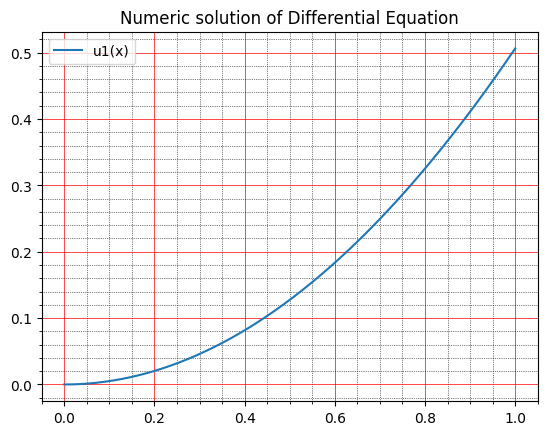

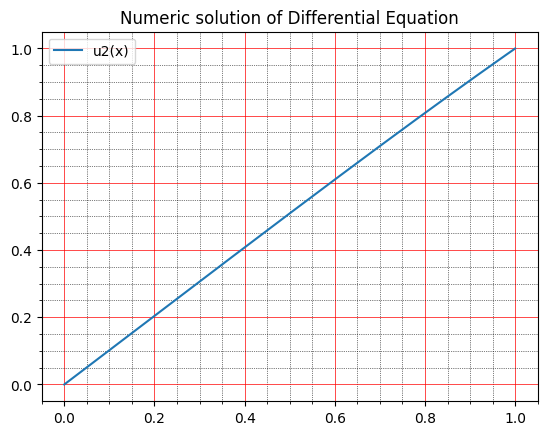

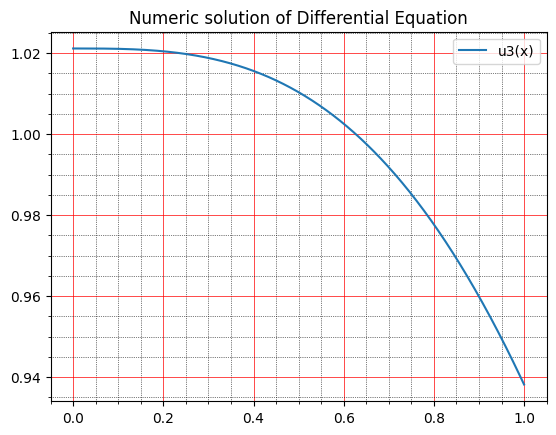

In [5]:
solution = blasius_shooting(s0=1, L=1)

t_n = solution[0]
u1_n = solution[1]
u2_n = solution[2]
u3_n = solution[3]

pplot(t_n, u1_n, "u1(x)")
pplot(t_n, u2_n, "u2(x)")
pplot(t_n, u3_n, "u3(x)")

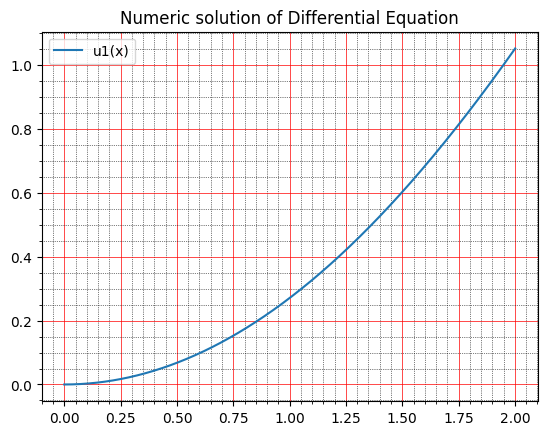

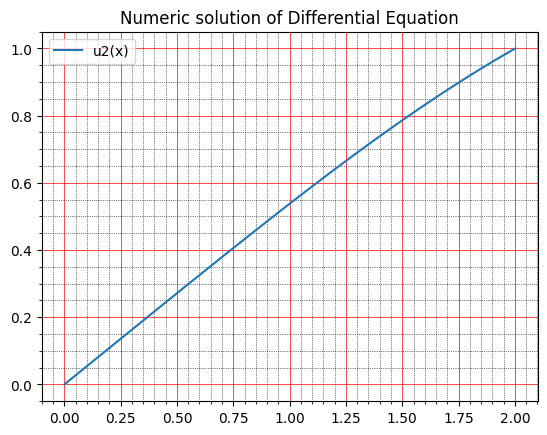

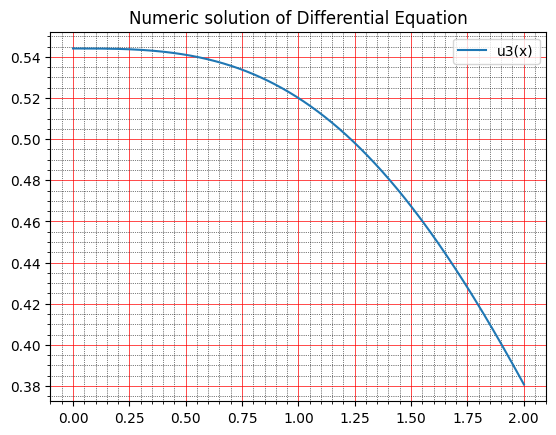

In [6]:
solution = blasius_shooting(s0=1, L=2)

t_n = solution[0]
u1_n = solution[1]
u2_n = solution[2]
u3_n = solution[3]

pplot(t_n, u1_n, "u1(x)")
pplot(t_n, u2_n, "u2(x)")
pplot(t_n, u3_n, "u3(x)")

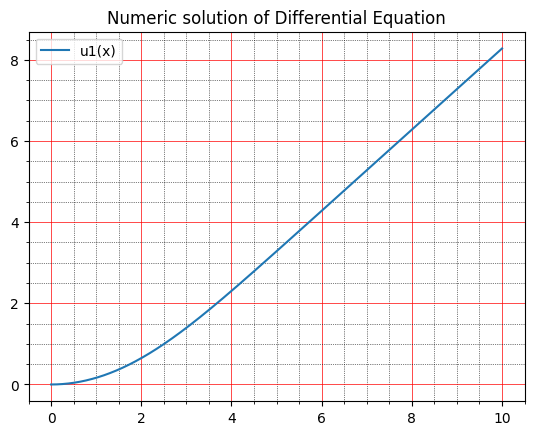

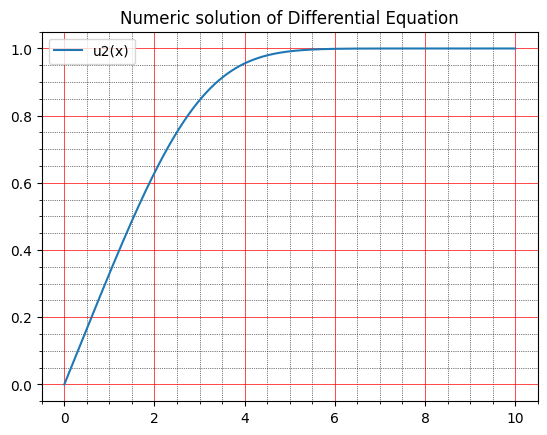

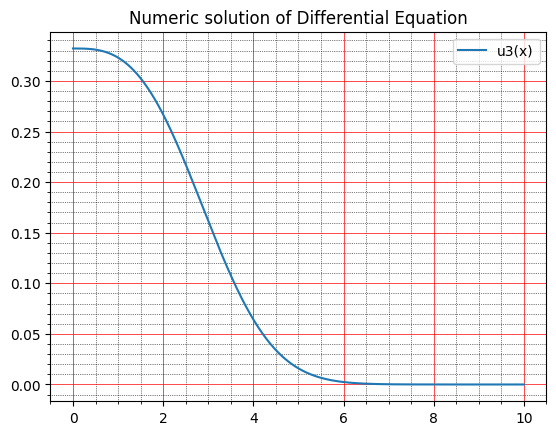

In [7]:
solution = blasius_shooting(s0=1, L=10)

t_n = solution[0]
u1_n = solution[1]
u2_n = solution[2]
u3_n = solution[3]

pplot(t_n, u1_n, "u1(x)")
pplot(t_n, u2_n, "u2(x)")
pplot(t_n, u3_n, "u3(x)")

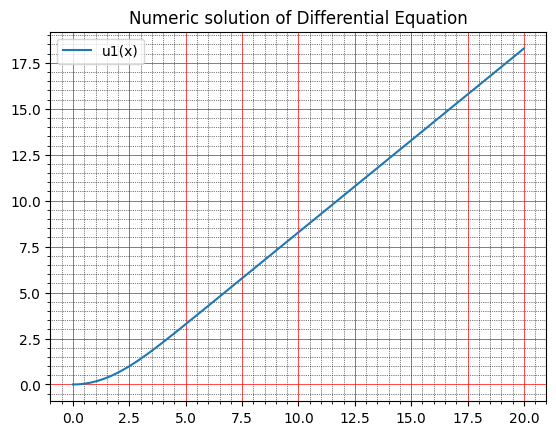

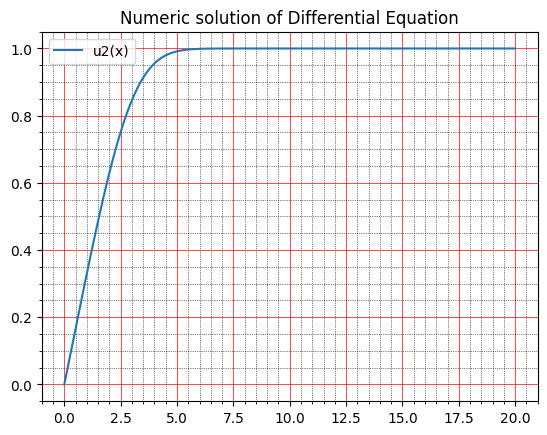

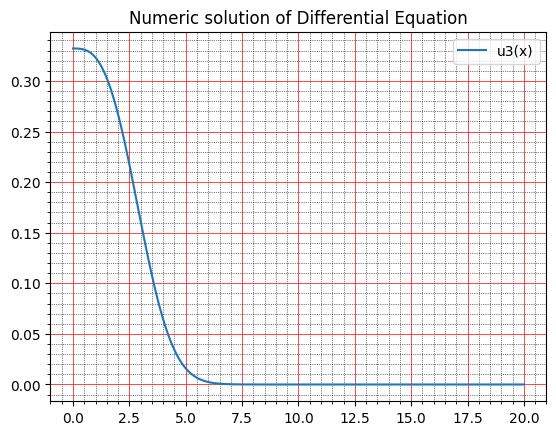

In [8]:
solution = blasius_shooting(s0=1, L=20)

t_n = solution[0]
u1_n = solution[1]
u2_n = solution[2]
u3_n = solution[3]

pplot(t_n, u1_n, "u1(x)")
pplot(t_n, u2_n, "u2(x)")
pplot(t_n, u3_n, "u3(x)")

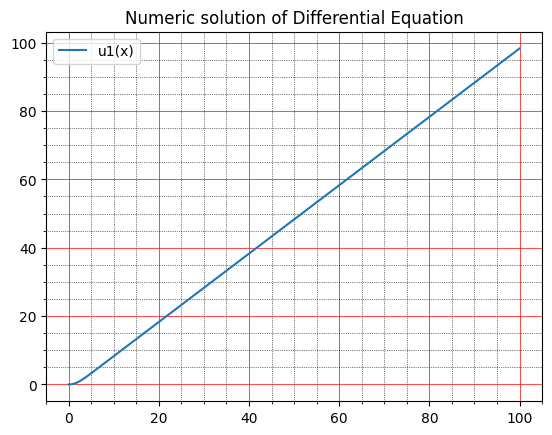

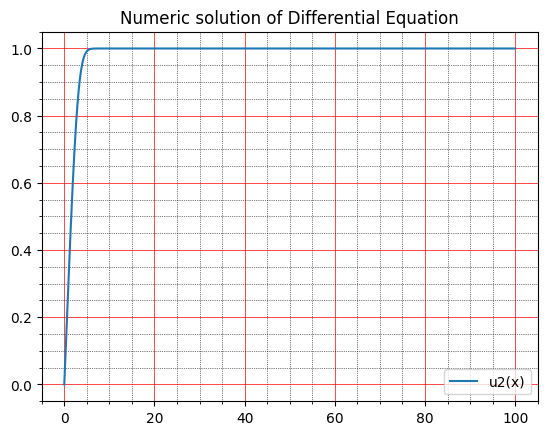

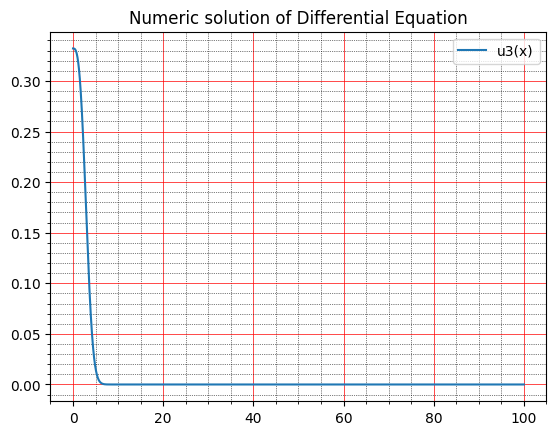

In [9]:
solution = blasius_shooting(s0=1, L=100)

t_n = solution[0]
u1_n = solution[1]
u2_n = solution[2]
u3_n = solution[3]

pplot(t_n, u1_n, "u1(x)")
pplot(t_n, u2_n, "u2(x)")
pplot(t_n, u3_n, "u3(x)")